In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
sns.set()

<h4>Importing data...

In [2]:
data = pd.read_csv('page-blocks.data',
                   delim_whitespace = True,
                   names = ['height', 'length', 'area', 'eccentricity',
                            'p_black', 'p_and', 'mean_tr', 'blackpix', 'blackand', 'wb_trans', 'class'])

In [3]:
data.head()

,height,length,area,eccentricity,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,class
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1


In [4]:
data.shape

(5473, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5473 entries, 0 to 5472
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   height        5473 non-null   int64  
 1   length        5473 non-null   int64  
 2   area          5473 non-null   int64  
 3   eccentricity  5473 non-null   float64
 4   p_black       5473 non-null   float64
 5   p_and         5473 non-null   float64
 6   mean_tr       5473 non-null   float64
 7   blackpix      5473 non-null   int64  
 8   blackand      5473 non-null   int64  
 9   wb_trans      5473 non-null   int64  
 10  class         5473 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 470.5 KB


In [6]:
data.describe()

,height,length,area,eccentricity,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,class
count,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000
mean,10.473232,89.568244,1198.405628,13.753977,0.368642,0.785053,6.219278,365.930751,741.108167,106.662891,1.202631
std,18.960564,114.721758,4849.376950,30.703737,0.177757,0.170661,69.079021,1270.333082,1881.504302,167.308362,0.721470
min,1.000000,1.000000,7.000000,0.007000,0.052000,0.062000,1.000000,7.000000,7.000000,1.000000,1.000000
25%,7.000000,17.000000,114.000000,2.143000,0.261000,0.679000,1.610000,42.000000,95.000000,17.000000,1.000000
50%,8.000000,41.000000,322.000000,5.167000,0.337000,0.803000,2.070000,108.000000,250.000000,49.000000,1.000000
75%,10.000000,107.000000,980.000000,13.625000,0.426000,0.927000,3.000000,284.000000,718.000000,126.000000,1.000000
max,804.000000,553.000000,143993.000000,537.000000,1.000000,1.000000,4955.000000,33017.000000,46133.000000,3212.000000,5.000000


<h4>Visualization of class distribution

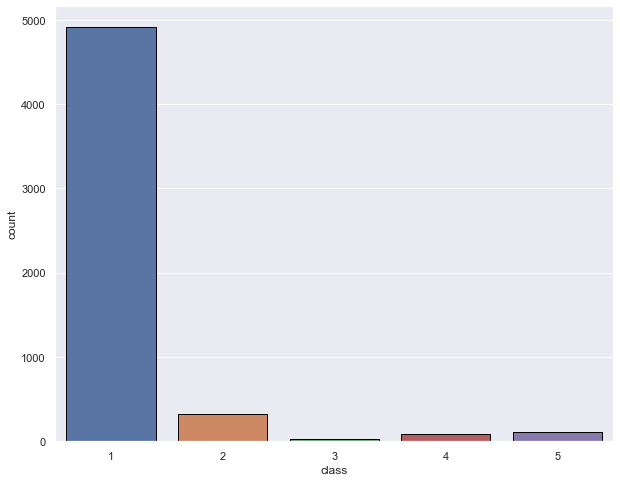

In [7]:
plt.figure(figsize = (10, 8))
sns.countplot(x = 'class', data = data, edgecolor = 'black')
plt.show()

In [8]:
data['class'].value_counts()

1    4913
2     329
5     115
4      88
3      28
Name: class, dtype: int64

C:\Users\PROBOOK\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

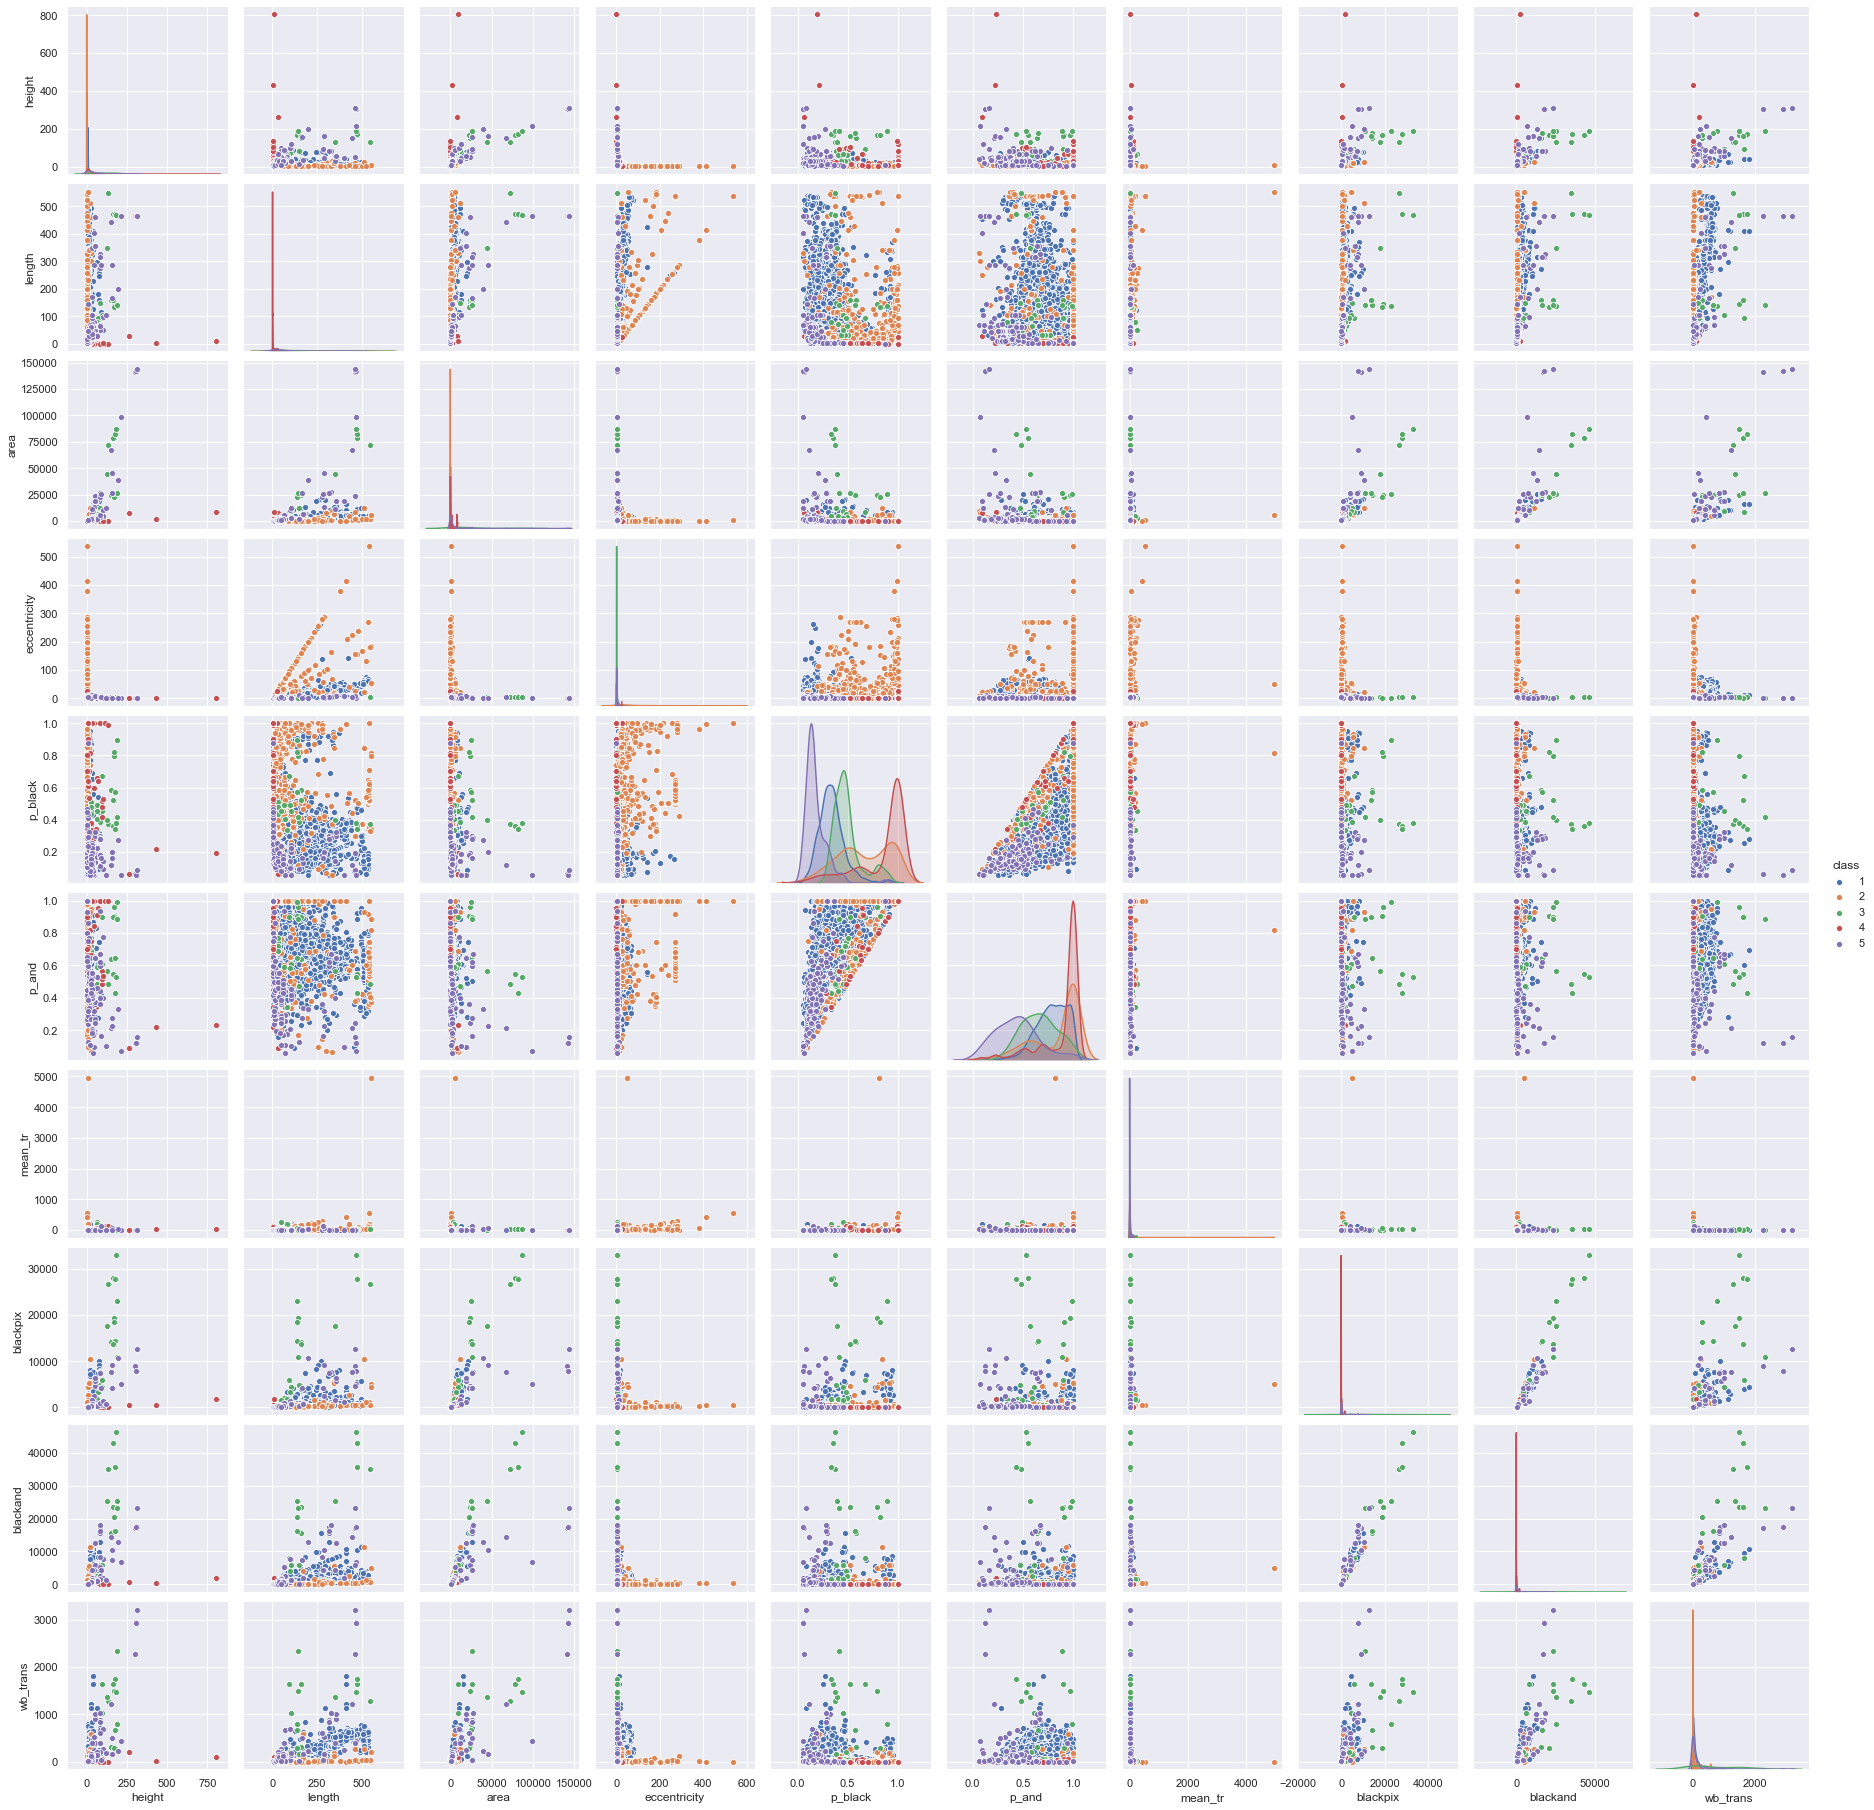

In [9]:
plt.figure(figsize = (10, 8))
sns.pairplot(data = data, hue = 'class')
plt.show()

In [10]:
def univariate_plot(data):
    for col in data.columns:
        plt.figure(figsize = (10, 8))
        sns.distplot(data[col], color = 'blue')
        plt.show()

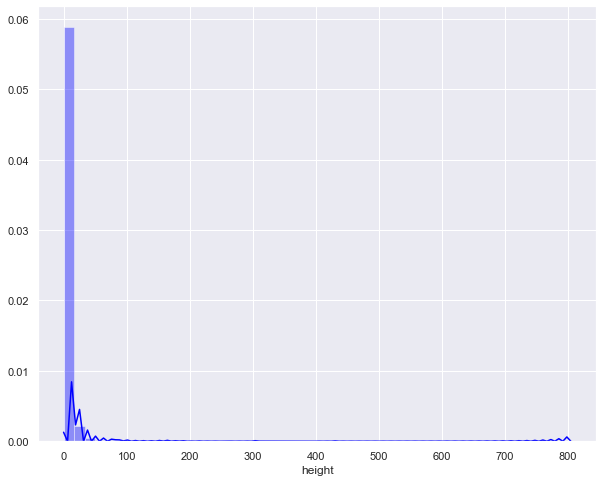

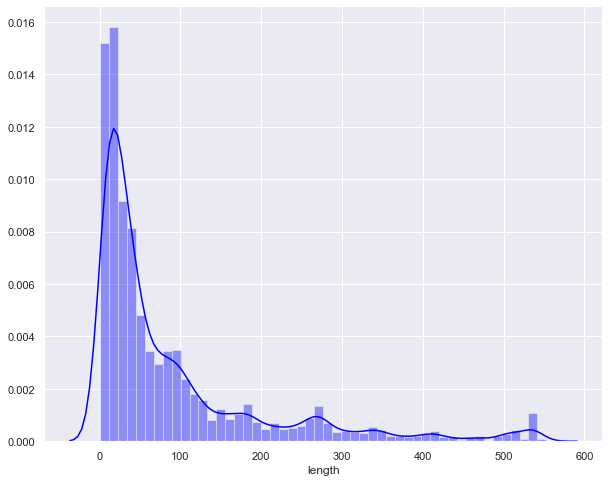

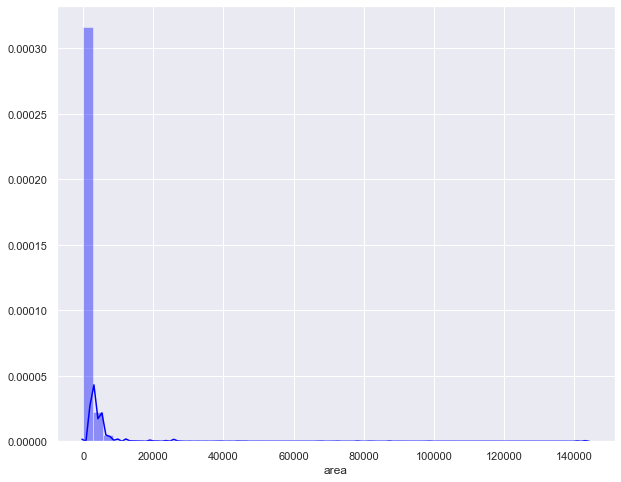

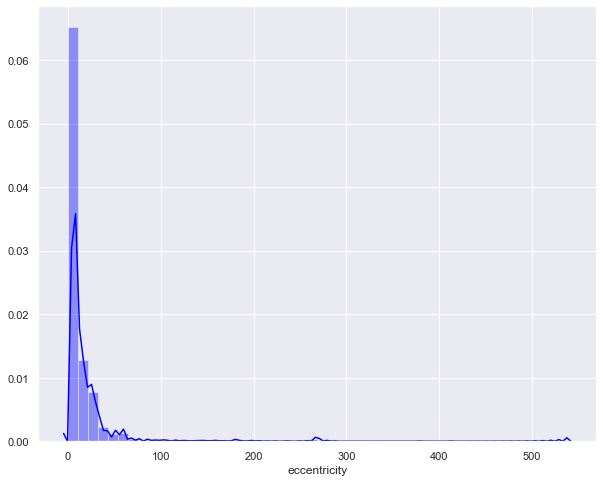

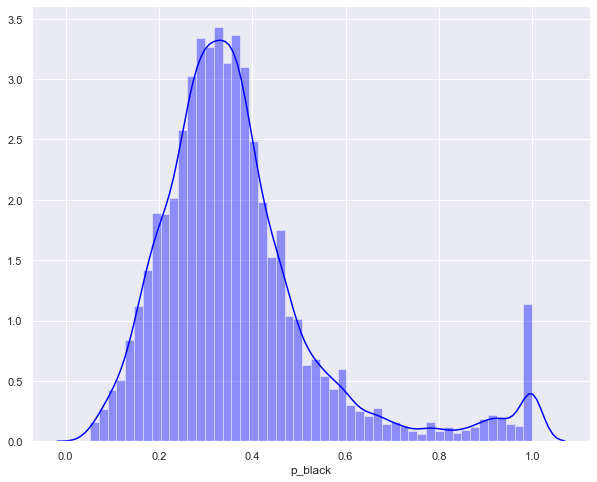

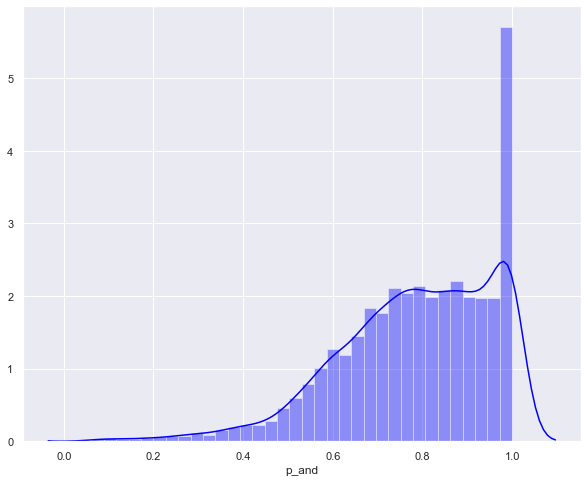

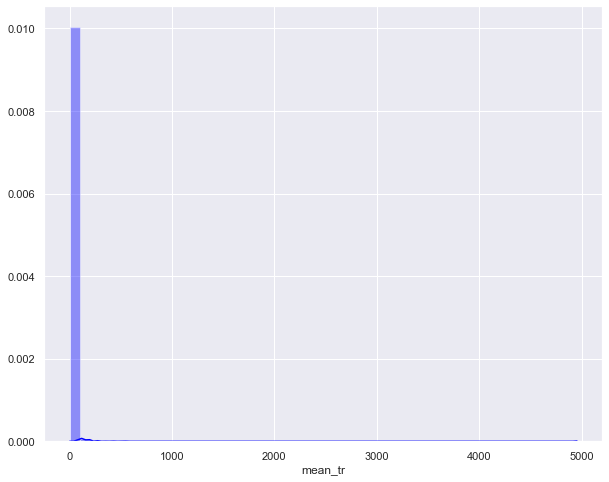

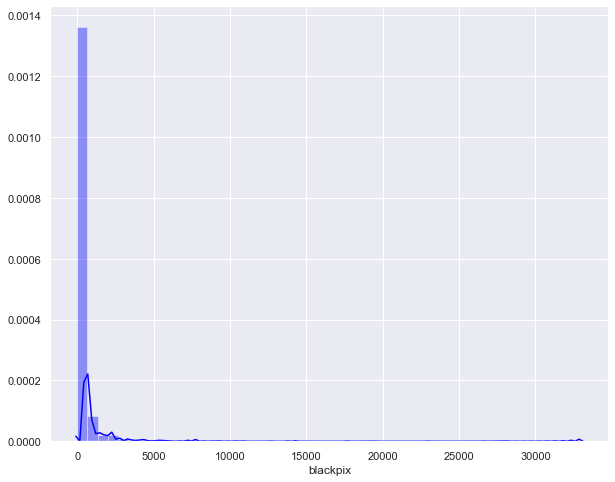

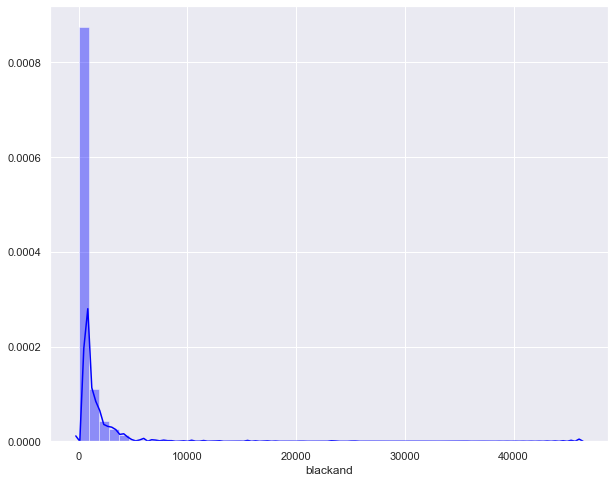

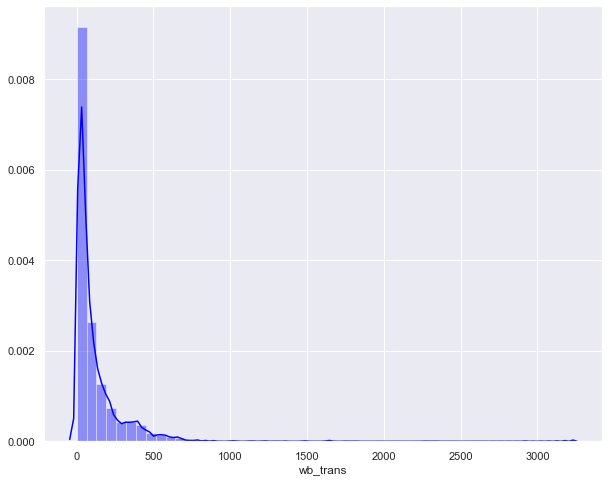

C:\Users\PROBOOK\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


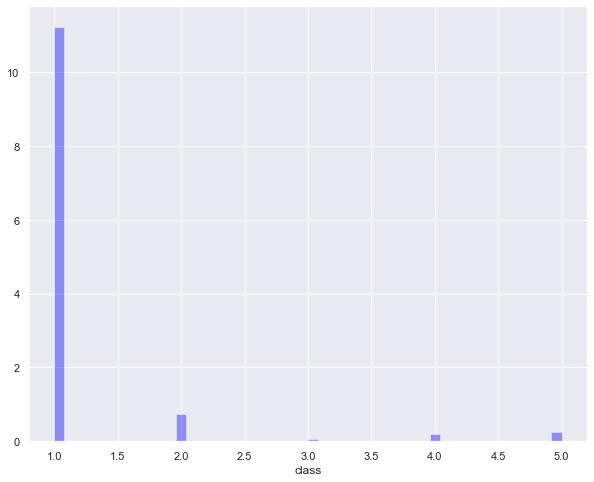

In [11]:
univariate_plot(data)

In [12]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

<h4>Eliminating outliers

In [13]:
from scipy import stats
z = np.abs(stats.zscore(X))
z

array([[0.28869038, 0.71979187, 0.23993019, ..., 0.27706348, 0.38170191,
        0.60171582],
       [0.23594451, 0.71979187, 0.23848657, ..., 0.27391441, 0.37426037,
        0.60769335],
       [0.23594451, 0.62389894, 0.22487533, ..., 0.26367994, 0.35140423,
        0.59573829],
       ...,
       [0.23594451, 0.04735154, 0.12959666, ..., 0.15346256, 0.11805897,
        0.01591752],
       [0.18319864, 0.42339555, 0.18796   , ..., 0.24006193, 0.2716735 ,
        0.36859201],
       [0.13045278, 0.7720971 , 0.24549842, ..., 0.28178708, 0.38967498,
        0.63160349]])

In [14]:
outliers = list(set(np.where(z > 3)[0]))

len(outliers)

509

In [15]:
X = X.drop(outliers, axis = 0).reset_index(drop = False)
display(X)

y = y[list(X["index"])]
len(y)

,index,height,length,area,eccentricity,p_black,p_and,mean_tr,blackpix,blackand,wb_trans
0,0,5,7,35,1.400,0.400,0.657,2.33,14,23,6
1,1,6,7,42,1.167,0.429,0.881,3.60,18,37,5
2,2,6,18,108,3.000,0.287,0.741,4.43,31,80,7
3,3,5,7,35,1.400,0.371,0.743,4.33,13,26,3
4,4,6,3,18,0.500,0.500,0.944,2.25,9,17,4
...,...,...,...,...,...,...,...,...,...,...,...
4959,5463,11,193,2123,17.545,0.243,0.683,1.59,516,1451,325
4960,5464,1,20,20,20.000,0.850,1.000,8.50,17,20,2
4961,5469,7,4,28,0.571,0.714,0.929,10.00,20,26,2
4962,5470,6,95,570,15.833,0.300,0.911,1.64,171,519,104


4964

In [16]:
X = X.drop(labels = 'index', axis = 1)

In [17]:
X['area per e'] = X['area'] / X['eccentricity']

In [18]:
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.pipeline import Pipeline

In [19]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 123)

In [21]:
len(np.unique(y))

5

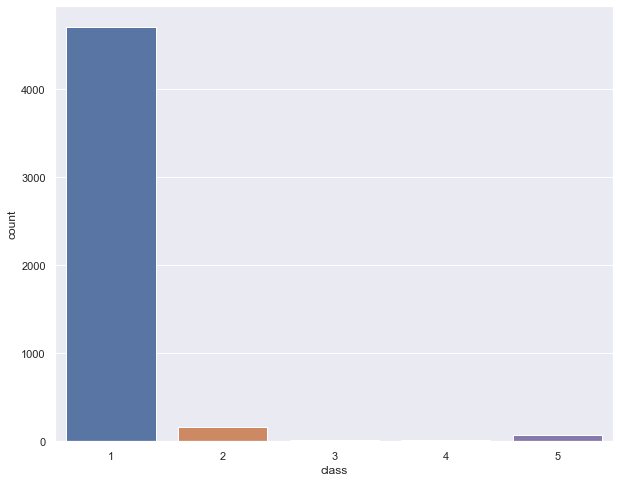

In [22]:
plt.figure(figsize = (10, 8))
sns.countplot(x = y)
plt.show()

<h4>Oversampling of the minority instances

In [23]:
sampler = SMOTE(k_neighbors = 4)

<h4>Power transformation

In [24]:
power = PowerTransformer(method = 'yeo-johnson')

**Scaler**

In [25]:
scaler = StandardScaler()

<h4>Model evaluation

In [26]:
def evaluate_model(models, X_train, y_train, X_test, y_test):
    models.fit(X_train, y_train)
    yhat = models.predict(X_test)
    
    acc_result = accuracy_score(y_test, yhat)
    f1_result = f1_score(y_test, yhat, average = 'macro')
    recall = recall_score(y_test, yhat, average = 'macro')
    precision = precision_score(y_test, yhat, average = 'macro')
    
    from pprint import pprint
    performance = {'accuracy' : acc_result,
                   'f1' : f1_result,
                   'recall' : recall,
                   'precision' : precision}
    
    print('                                        ')
    print('**********************************')
    print('**********************************')
    print(classification_report(y_test, yhat))
    
    cm = confusion_matrix(y_test, yhat)
    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
    ax.xaxis.set_ticklabels(list(y_train.unique()), fontsize = 12)
    ax.yaxis.set_ticklabels(list(y_train.unique()), fontsize = 12, rotation=0)
    ax.set_xlabel('Predicted Labels',fontsize = 15)
    ax.set_ylabel('True Labels',fontsize = 15)
    plt.show()
    return performance

<h4>Model selection and training

In [27]:
from sklearn.svm import SVC

In [28]:
svc = SVC(random_state = 123)

In [29]:
svc_pipe = Pipeline(steps = [('Sampler', sampler),
                             ('Power', power),
                             ('Scaler', scaler),
                             ('Model', svc)
                            ])

                                        
**********************************
**********************************
              precision    recall  f1-score   support

           1       1.00      0.95      0.97      1411
           2       0.68      0.88      0.77        49
           3       0.60      1.00      0.75         3
           4       0.45      0.83      0.59         6
           5       0.26      0.90      0.41        21

    accuracy                           0.94      1490
   macro avg       0.60      0.91      0.70      1490
weighted avg       0.97      0.94      0.95      1490



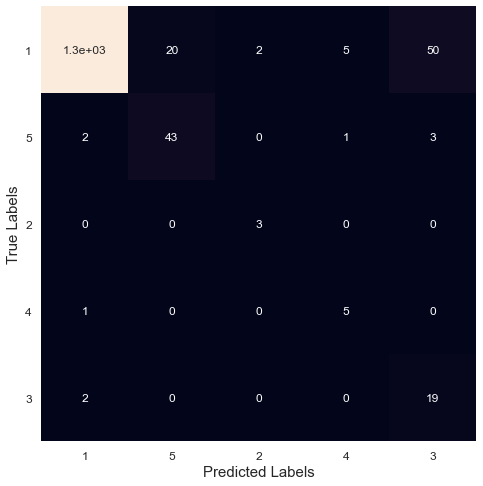

In [30]:
svc_performance = evaluate_model(svc_pipe, X_train, y_train, X_test, y_test)

In [31]:
svc_performance

{'accuracy': 0.9422818791946309,
 'f1': 0.6969752811388485,
 'recall': 0.9122150064845215,
 'precision': 0.5994479792052607}

In [32]:
from sklearn.linear_model import RidgeClassifier, SGDClassifier

In [33]:
ridge = RidgeClassifier(normalize = True)
sgd = SGDClassifier(learning_rate = 'adaptive', eta0 = 0.1, random_state = 123, class_weight = 'balanced')

In [34]:
ridge_pipe = Pipeline(steps = [('Sampler', sampler),
                               ('Power', power),
                               ('Scaler', scaler),
                               ('Model', ridge)
                              ])

In [35]:
sgd_pipe = Pipeline(steps = [('Sampler', sampler),
                             ('Power', power),
                             ('Scaler', scaler),
                             ('Model', sgd)
                            ])

                                        
**********************************
**********************************
              precision    recall  f1-score   support

           1       1.00      0.77      0.87      1411
           2       0.55      0.88      0.68        49
           3       0.03      1.00      0.07         3
           4       0.05      0.83      0.10         6
           5       0.11      0.76      0.20        21

    accuracy                           0.77      1490
   macro avg       0.35      0.85      0.38      1490
weighted avg       0.97      0.77      0.85      1490



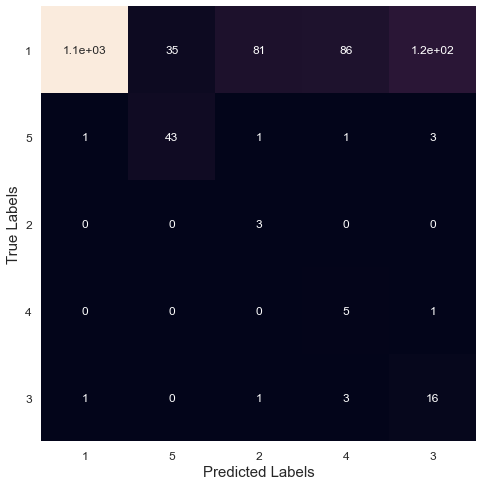

In [36]:
Ridge_performance = evaluate_model(ridge_pipe, X_train, y_train, X_test, y_test)

                                        
**********************************
**********************************
              precision    recall  f1-score   support

           1       1.00      0.90      0.94      1411
           2       0.62      0.92      0.74        49
           3       0.18      1.00      0.30         3
           4       0.25      0.83      0.38         6
           5       0.17      0.95      0.29        21

    accuracy                           0.90      1490
   macro avg       0.44      0.92      0.53      1490
weighted avg       0.97      0.90      0.92      1490



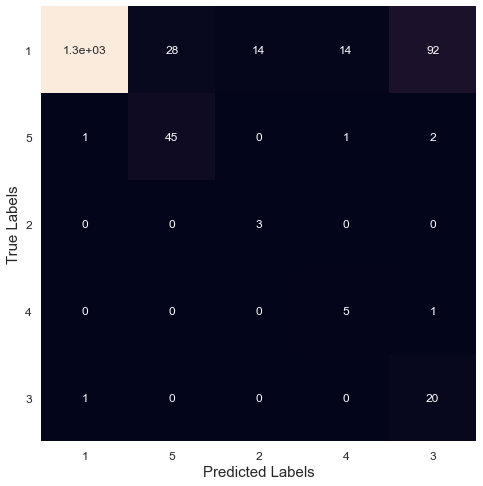

In [37]:
sgd_performance = evaluate_model(sgd_pipe, X_train, y_train, X_test, y_test)

In [38]:
sgd_performance

{'accuracy': 0.8966442953020134,
 'f1': 0.5320768276095604,
 'recall': 0.9198382967644889,
 'precision': 0.44304819204199086}

In [39]:
params = {'Model__eta0' : [0.01, 0.05, 0.1, 0.15, 0.2]}

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [42]:
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3)

In [43]:
sgd_grid = GridSearchCV(estimator = sgd_pipe, cv = cv, param_grid = params, n_jobs = -1, scoring = 'f1_macro')
sgd_grid.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=Pipeline(steps=[('Sampler', SMOTE(k_neighbors=4)),
                                       ('Power', PowerTransformer()),
                                       ('Scaler', StandardScaler()),
                                       ('Model',
                                        SGDClassifier(class_weight='balanced',
                                                      eta0=0.1,
                                                      learning_rate='adaptive',
                                                      random_state=123))]),
             n_jobs=-1,
             param_grid={'Model__eta0': [0.01, 0.05, 0.1, 0.15, 0.2]},
             scoring='f1_macro')

In [44]:
sgd_grid.best_score_

0.5960159638673443

In [45]:
sgd_grid.best_params_

{'Model__eta0': 0.2}

In [46]:
data['class'].value_counts()/data.shape[0]

1    0.897680
2    0.060113
5    0.021012
4    0.016079
3    0.005116
Name: class, dtype: float64

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc = RandomForestClassifier(n_estimators = 200, max_depth = 6, class_weight = 'balanced', random_state = 123)

In [49]:
rfc_pipe = Pipeline(steps = [('Sampler', sampler),
                             ('Power', power),
                             ('Model', rfc)
                            ])

                                        
**********************************
**********************************
              precision    recall  f1-score   support

           1       1.00      0.94      0.97      1411
           2       0.79      0.92      0.85        49
           3       0.67      0.67      0.67         3
           4       0.36      0.67      0.47         6
           5       0.22      1.00      0.36        21

    accuracy                           0.93      1490
   macro avg       0.61      0.84      0.66      1490
weighted avg       0.98      0.93      0.95      1490



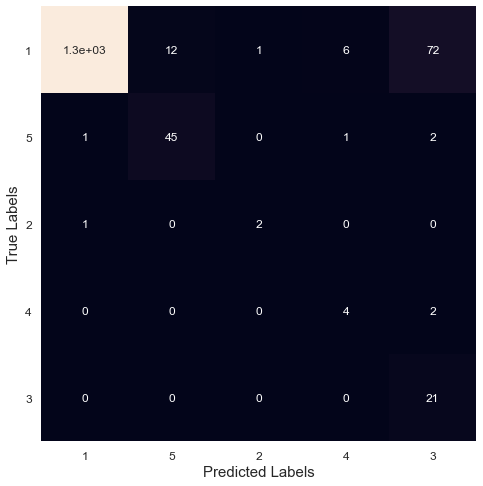

In [50]:
rfc_performance = evaluate_model(rfc_pipe, X_train, y_train, X_test, y_test)

In [51]:
from sklearn.ensemble import AdaBoostClassifier

In [52]:
ada = AdaBoostClassifier(n_estimators = 300, learning_rate = 0.01,
                         base_estimator = RandomForestClassifier(max_depth = 6,
                                                                 class_weight = 'balanced',
                                                                 random_state = 123), random_state = 123)

In [53]:
ada_pipe = Pipeline(steps = [('Sampler', sampler),
                             ('Power', power),
                             ('Scaler', scaler),
                             ('Model', ada)
                            ])

                                        
**********************************
**********************************
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1411
           2       0.84      0.86      0.85        49
           3       0.50      0.33      0.40         3
           4       0.38      0.50      0.43         6
           5       0.67      0.76      0.71        21

    accuracy                           0.98      1490
   macro avg       0.67      0.69      0.68      1490
weighted avg       0.98      0.98      0.98      1490



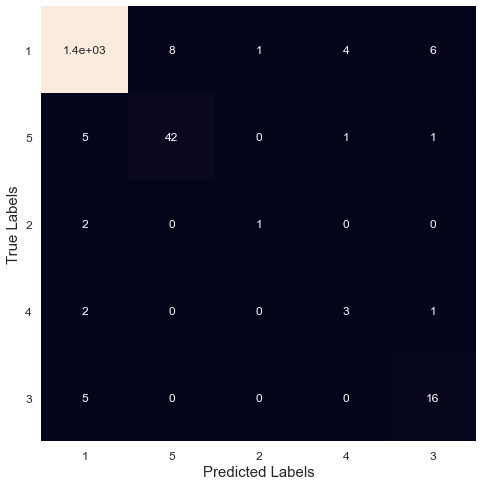

In [54]:
ada_performance = evaluate_model(ada_pipe, X_train, y_train, X_test, y_test)

<h4> Trying out lightboost classifier...

In [55]:
from lightgbm import LGBMClassifier

In [56]:
lgbm = LGBMClassifier(max_depth = 3,
                      class_weight = 'balanced',
                      objective = 'multiclass', n_estimators = 300, learning_rate = 0.07)

In [57]:
lgbm_pipe = Pipeline(steps = [('Sampler', sampler),
                              ('Power', power),
                              ('Scaler', scaler),
                              ('Model', lgbm)
                             ])

                                        
**********************************
**********************************
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1411
           2       0.83      0.88      0.85        49
           3       1.00      0.67      0.80         3
           4       0.33      0.50      0.40         6
           5       0.73      0.76      0.74        21

    accuracy                           0.98      1490
   macro avg       0.78      0.76      0.76      1490
weighted avg       0.98      0.98      0.98      1490



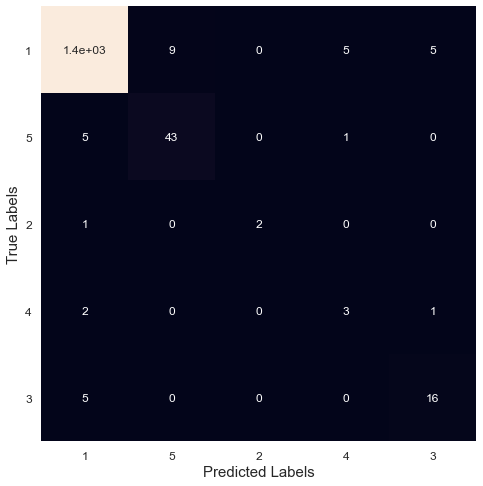

In [58]:
lgbm_performance = evaluate_model(lgbm_pipe, X_train, y_train, X_test, y_test)

In [59]:
performance = pd.DataFrame({'RFC' : rfc_performance,
                            'AdaBoost' : ada_performance,
                            'LightGBM' : lgbm_performance})

In [60]:
performance

,RFC,AdaBoost,LightGBM
accuracy,0.934228,0.975839,0.977181
f1,0.661643,0.675291,0.756862
recall,0.837441,0.687783,0.758531
precision,0.606952,0.674342,0.775655


In [61]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [62]:
cv = RepeatedStratifiedKFold(n_splits = 2, n_repeats = 3)

In [63]:
lgbm_pipe

Pipeline(steps=[('Sampler', SMOTE(k_neighbors=4)),
                ('Power', PowerTransformer()), ('Scaler', StandardScaler()),
                ('Model',
                 LGBMClassifier(class_weight='balanced', learning_rate=0.07,
                                max_depth=3, n_estimators=300,
                                objective='multiclass'))])

In [64]:
lgbm_params = {'Model__n_estimators' : [i for i in range(100, 800, 100)],
               'Model__learning_rate' : [0.07, 0.08, 0.09, 0.1],
               'Model__class_weight' : [None, 'balanced']}

In [65]:
grid_objects = {}
for scoring in ['recall_macro', 'precision_macro', 'f1_macro', 'accuracy']:
    lgbm_grid = GridSearchCV(estimator = lgbm_pipe, param_grid = lgbm_params, cv = cv, scoring = scoring, n_jobs = -1)
    lgbm_grid.fit(X_train, y_train)
    grid_objects[scoring] = lgbm_grid.best_estimator_
    print('---------------------')
    print('For {} :'.format(scoring))
    print(f'Best parameters : {lgbm_grid.best_params_}')
    print(f'Best score : {lgbm_grid.best_score_}')

---------------------
For recall_macro :
Best parameters : {'Model__class_weight': None, 'Model__learning_rate': 0.07, 'Model__n_estimators': 100}
Best score : nan
---------------------
For precision_macro :
Best parameters : {'Model__class_weight': None, 'Model__learning_rate': 0.07, 'Model__n_estimators': 100}
Best score : nan
---------------------
For f1_macro :
Best parameters : {'Model__class_weight': None, 'Model__learning_rate': 0.07, 'Model__n_estimators': 100}
Best score : nan
---------------------
For accuracy :
Best parameters : {'Model__class_weight': None, 'Model__learning_rate': 0.07, 'Model__n_estimators': 100}
Best score : nan


In [68]:
new_lgbm = LGBMClassifier(max_depth = 3, class_weight = 'balanced',
                          objective = 'multiclass', n_estimators = 600,
                          learning_rate = 0.1)


new_lgbm.fit(X_train, y_train)

print(f'Train roc_score: {f1_score(y_train, new_lgbm.predict(X_train), average = "macro")}')
print(f'Train roc_score: {f1_score(y_test, new_lgbm.predict(X_test), average = "macro")}')

Train roc_score: 0.9990962193036346
Train roc_score: 0.6737345595119446
